In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import shutil
import time
sns.set()

In [8]:
labels = np.zeros(7974)

In [18]:
true_train_images = np.full((5900,1,32,1),27)
train_labels = np.zeros(5900,)

true_val_images = np.full((1000,1,32,1),0)
val_labels = np.zeros(1000,)

true_test_images = np.full((1074,1,32,1),0)
test_labels = np.zeros(1074,)

In [19]:
model = keras.Sequential()                                      #input_shape = (height, width, channels)
model.add(keras.layers.Conv2D(64, (1,32) ,activation='relu',input_shape=(1,32,1),padding='same',data_format='channels_last'))
model.add(keras.layers.MaxPooling2D((1,7), strides=(1,4)))
model.add(keras.layers.Conv2D(72, (1,16),activation='relu',padding = 'same'))
model.add(keras.layers.MaxPooling2D((1,7), strides=(1,4)))
model.add(keras.layers.Flatten())
#potentially add dropout here at value = 0.5
model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])


In [20]:
history = model.fit(true_train_images,
train_labels,
epochs=5,
batch_size=64,
validation_data=(true_val_images, val_labels))

Train on 5900 samples, validate on 1000 samples
Epoch 1/5
5900/5900 [==============================] - 1s 119us/sample - loss: 0.0059 - acc: 1.0000 - val_loss: 0.6854 - val_acc: 1.0000
Epoch 2/5
5900/5900 [==============================] - 0s 69us/sample - loss: 1.0053e-07 - acc: 1.0000 - val_loss: 0.6853 - val_acc: 1.0000
Epoch 3/5
5900/5900 [==============================] - 0s 70us/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 0.6853 - val_acc: 1.0000
Epoch 4/5
5900/5900 [==============================] - 0s 69us/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 0.6853 - val_acc: 1.0000
Epoch 5/5
5900/5900 [==============================] - 0s 71us/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 0.6853 - val_acc: 1.0000


In [21]:
test_loss, test_acc = model.evaluate(true_test_images, test_labels)

1074/1074 [==============================] - 0s 50us/sample - loss: 0.6853 - acc: 1.0000


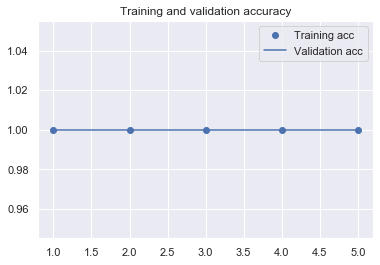

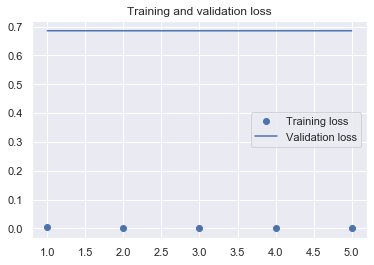

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()